<a href="https://colab.research.google.com/github/lbraun6/IHKA-Seizure-Detection/blob/main/EEG_Seizure_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import statements
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [10]:
# Load dataset
uploaded = files.upload() # Prompts you to select your excel file
df = pd.read_excel("Compiled EEG Seizure Output Logs.xlsx", sheet_name="All Animals")

Saving Compiled EEG Seizure Output Logs.xlsx to Compiled EEG Seizure Output Logs.xlsx


In [36]:
# Preprocessing artifacts
df = df[df["Power"] < 100]

In [37]:
# Initial descriptive stats
per_animal_per_date = (df.groupby(["Animal", "Days Post-KA Infusion"]).agg(seizures=("Days Post-KA Infusion", "size"),
                                                                           duration=("Duration (s)", "sum"),
                                                                           duration_per_seizure=("Duration (s)", "mean"),
                                                                           duration_per_seizure_sd=("Duration (s)", "std"),
                                                                           power_per_seizure=("Power", "mean"),
                                                                           power_per_seizure_sd=("Power", "std")).reset_index())

per_animal = (df.groupby("Animal").agg(total_days=("Days Post-KA Infusion", "nunique"),
                                       total_seizure_count=("Days Post-KA Infusion", "size"),
                                       total_duration=("Duration (s)", "sum"),
                                       overall_duration_per_seizure=("Duration (s)", "mean"),
                                       overall_duration_per_seizure_sd=("Duration (s)", "std"),
                                       overall_power_per_seizure=("Power", "mean"),
                                       overall_power_per_seizure_sd=("Power", "std")).reset_index())

average_per_animal_per_date = (per_animal_per_date.groupby("Animal").agg(seizures_per_day=("seizures", "mean"),
                                                      seizures_per_day_sd=("seizures", "std"),
                                                      duration_per_seizure_per_day=("duration_per_seizure", "mean"),
                                                      duration_per_seizure_per_day_sd=("duration_per_seizure", "std"),
                                                      power_per_seizure_per_day=("power_per_seizure", "mean"),
                                                      power_per_seizure_per_day_sd=("power_per_seizure", "std")).reset_index())

per_animal_per_date = per_animal_per_date.round(2)
average_per_animal_per_date = average_per_animal_per_date.round(2)
per_animal = per_animal.round(2)

with pd.ExcelWriter("EEG Seizure Detection Descriptive Statistics.xlsx") as writer:
    per_animal_per_date.to_excel(writer, sheet_name="Per Animal Per Date", index=False)
    average_per_animal_per_date.to_excel(writer, sheet_name="Average Per Animal Per Date", index=False)
    per_animal.to_excel(writer, sheet_name="Per Animal", index=False)


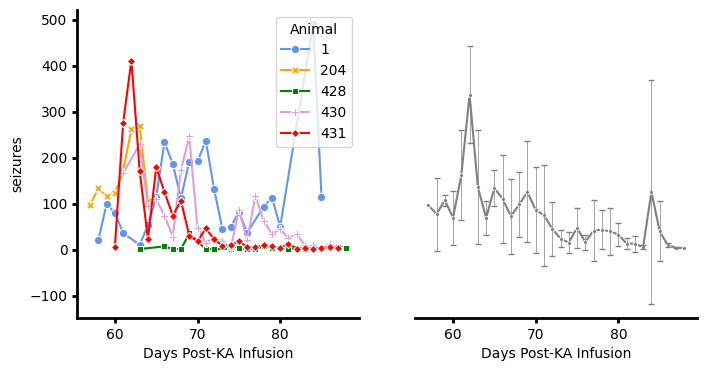

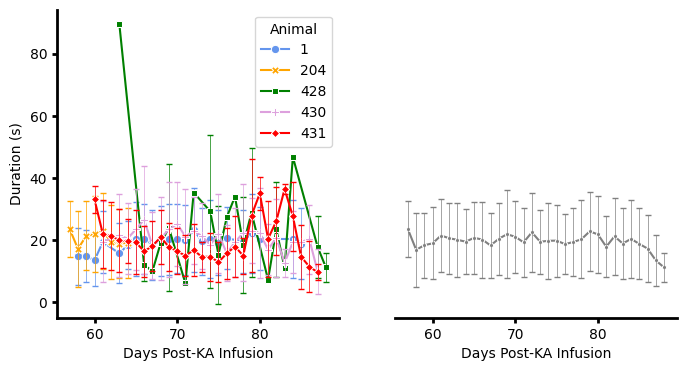

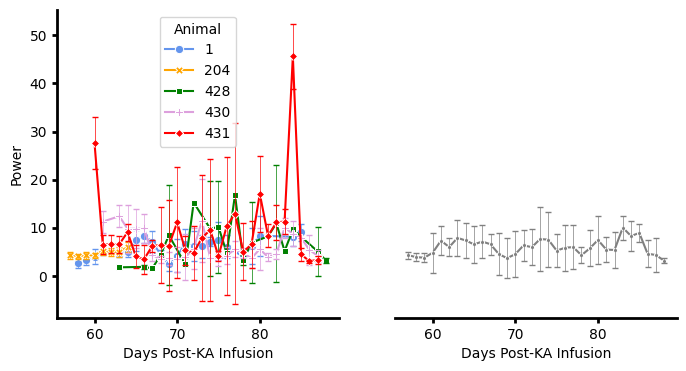

In [58]:
# Initial visualizations

# Total seizures over time
fig, ax = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8, 4)
sns.lineplot(data=per_animal_per_date,
             x="Days Post-KA Infusion",
             y="seizures",
             hue="Animal",
             style="Animal",
             palette=["cornflowerblue", "orange", "green", "plum", "red"],
             markers=True,
             dashes=False,
             ax=ax[0])
sns.lineplot(data=per_animal_per_date,
             x="Days Post-KA Infusion",
             y="seizures",
             errorbar="sd",
             err_style="bars",
             err_kws={"linewidth": 0.5, "capsize": 2},
             color="grey",
             marker=".",
             dashes=False,
             ax=ax[1])
for a in ax:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax[1].spines["left"].set_visible(False)
ax[0].spines["left"].set_linewidth(2)

ax[1].tick_params(axis="y", length=0)
ax[0].tick_params(axis="x", width=2)
ax[1].tick_params(axis="x", width=2)
ax[0].tick_params(axis="y", width=2)

# Seizure duration over time
fig1, ax1 = plt.subplots(1, 2, sharey=True)
fig1.set_size_inches(8, 4)
sns.lineplot(data=df,
             x="Days Post-KA Infusion",
             y="Duration (s)",
             hue="Animal",
             errorbar="sd",
             err_style="bars",
             err_kws={"linewidth": 0.5, "capsize": 2},
             style="Animal",
             palette=["cornflowerblue", "orange", "green", "plum", "red"],
             markers=True,
             dashes=False,
             ax=ax1[0])
sns.lineplot(data=df,
             x="Days Post-KA Infusion",
             y="Duration (s)",
             errorbar="sd",
             err_style="bars",
             err_kws={"linewidth": 0.5, "capsize": 2},
             color="grey",
             marker=".",
             dashes=False,
             ax=ax1[1])
for a in ax1:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax1[1].spines["left"].set_visible(False)
ax1[0].spines["left"].set_linewidth(2)

ax1[1].tick_params(axis="y", length=0)
ax1[0].tick_params(axis="x", width=2)
ax1[1].tick_params(axis="x", width=2)
ax1[0].tick_params(axis="y", width=2)

# Seizure power over time
fig2, ax2 = plt.subplots(1, 2, sharey=True)
fig2.set_size_inches(8, 4)
sns.lineplot(data=df,
             x="Days Post-KA Infusion",
             y="Power",
             hue="Animal",
             style="Animal",
             errorbar="sd",
             err_style="bars",
             err_kws={"linewidth": 0.5, "capsize": 2},
             palette=["cornflowerblue", "orange", "green", "plum", "red"],
             markers=True,
             dashes=False,
             ax=ax2[0])
sns.lineplot(data=df,
             x="Days Post-KA Infusion",
             y="Power",
             errorbar="sd",
             err_style="bars",
             err_kws={"linewidth": 0.5, "capsize": 2},
             color="grey",
             marker=".",
             dashes=False,
             ax=ax2[1])
for a in ax2:
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_linewidth(2)

ax2[1].spines["left"].set_visible(False)
ax2[0].spines["left"].set_linewidth(2)

ax2[1].tick_params(axis="y", length=0)
ax2[0].tick_params(axis="x", width=2)
ax2[1].tick_params(axis="x", width=2)
ax2[0].tick_params(axis="y", width=2)

# Power v. duration correlation


In [ ]:
# Preprocess dataset
clean_df = df.copy()

print(clean_df) # Preview